In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('housing.csv')
df.sample(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
49,86754.196629,6.604440,6.252455,4.02,43017.440757,1.662495e+06,"91863 Curtis Point\nNew Richard, AK 99996-7554"
4513,61269.674414,5.422936,7.724148,5.12,36337.755249,9.817851e+05,"300 Michael Pass\nEast Sabrina, NH 85828"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df['Address'].nunique()

5000

In [8]:
df['Price'].nunique()

5000

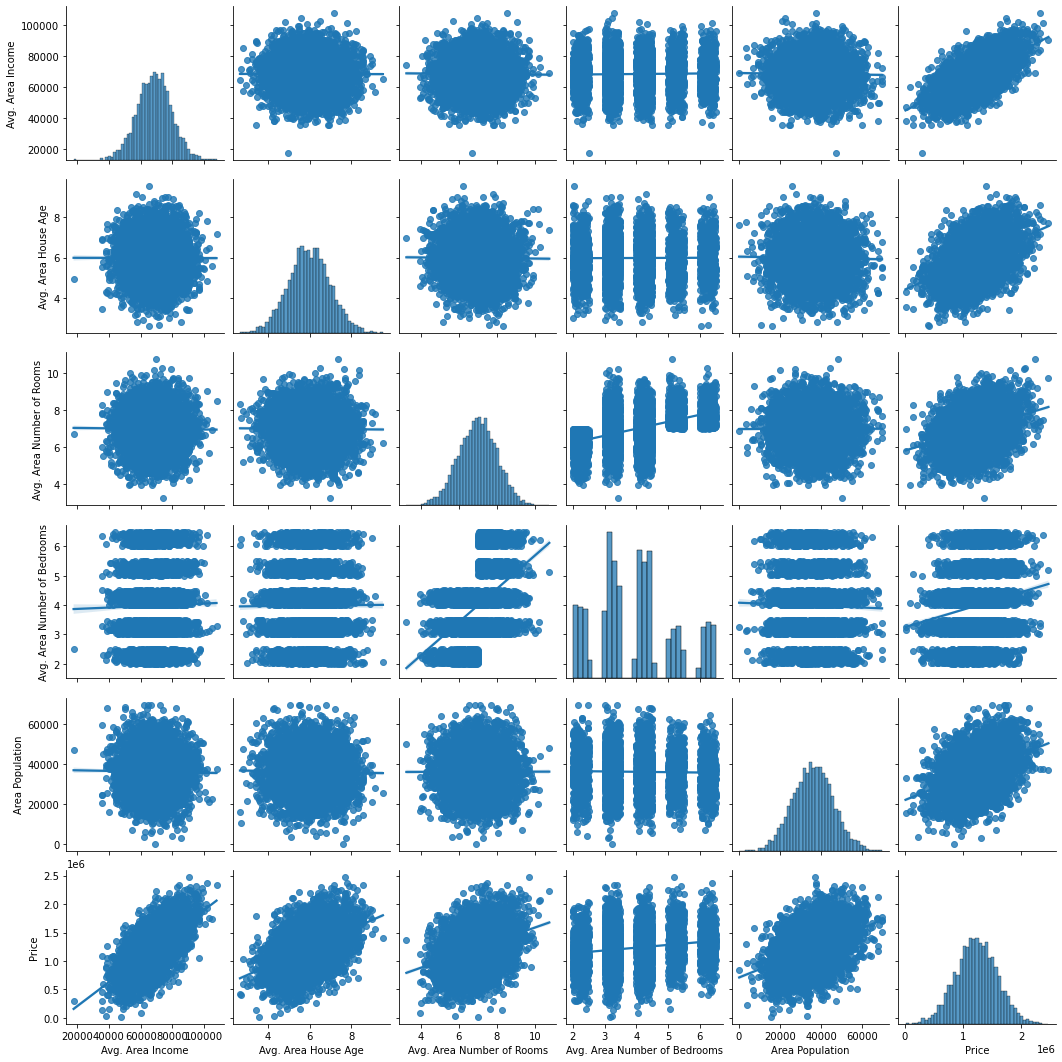

In [11]:
sns.pairplot(data = df, kind='reg')

<AxesSubplot:>

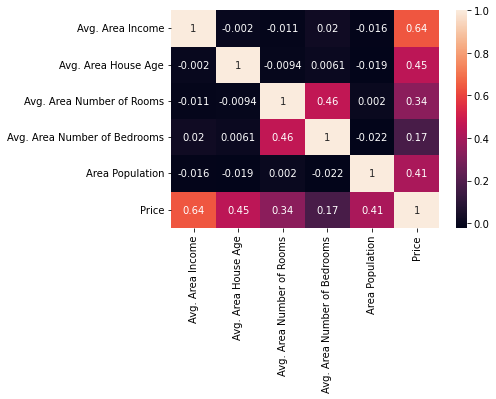

In [9]:
sns.heatmap(df.corr(), annot=True)

In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
target = df['Price']
features = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population']]

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(
    features, target, test_size = 0.25, random_state=101
)

In [14]:
xtrain.shape

(3750, 4)

In [15]:
xtest.shape

(1250, 4)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [18]:
model.score(xtest, ytest) * 100

91.70576659270534

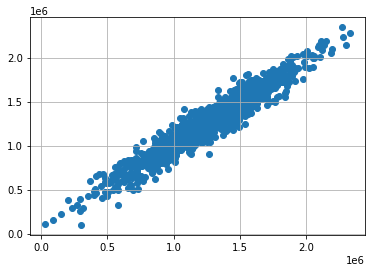

In [19]:
ypred_test = model.predict(xtest)
plt.scatter(ytest,ypred_test)
plt.grid()

In [20]:
xtrain.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population'],
      dtype='object')

In [24]:
query_data = {
    'Avg. Area Income':[200000], 
    'Avg. Area House Age':[6], 
    'Avg. Area Number of Rooms':[5], 
    'Area Population':[30000]
}
result = model.predict(pd.DataFrame(query_data))
print(result[0])

3743363.8242754387


In [28]:
pd.to_pickle(model, 'housePrice.pickle')